# Trabajando con Wikipedia

En las próximas líneas, veremos algunas herramientas para trabajar con la [API de Wikipedia](https://www.mediawiki.org/wiki/API:Main_page).

Al igual que algunas de las APIs ya vistas, existe un url al cual sumándole parámetros, podemos realizar la búsuqeda deseada. 

Veamos algunos ejemplos (para nada exhaustivos)

In [2]:
import requests # Utilizada para los request al url
import wordcloud # Haremos algo con texto
from bs4 import BeautifulSoup as bs # Lo usamos para trabajar un poquito con html
import matplotlib.pylab as plt # Graficos
import nltk # Lo voy a usar para un poco de procesamiento de lenguaje
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Ejemplo de búsqueda de páginas de Wikipedia, que contengan cierta palabra en su título

Supongamos que estamos por empezar a trabajar con datos de Wikipedia, y en una fase exploratoria tenemos que encontrar las páginas relacionadas con cierto tema.

Para eso, podemos mezclar la "action" : "query" con la "list" : "allpages".

In [3]:
URL = "https://es.wikipedia.org/w/api.php" # El url de la API, no es el único, por ejemplo, podemos cambiar es--->en y así buscar en inglés.

PARAMS = {
          "action": "query",
          "format": "json",
          "list": "allpages",
          "apfrom" : "Cristina Fernandez de Kirchner"
          }
search = requests.get(URL, # Pasamos el url
                      params = PARAMS) # Pasamos los parámetros definidos previamente

In [7]:
search.json()

{'batchcomplete': '',
 'continue': {'apcontinue': 'Cristina_Fernández_Wilhelm', 'continue': '-||'},
 'query': {'allpages': [{'ns': 0,
    'pageid': 2028192,
    'title': 'Cristina Fernandez de Kirchner'},
   {'ns': 0, 'pageid': 1725718, 'title': 'Cristina Fernández'},
   {'ns': 0, 'pageid': 2284714, 'title': 'Cristina Fernández-Cubas'},
   {'ns': 0,
    'pageid': 2098795,
    'title': 'Cristina Fernández (desambiguación)'},
   {'ns': 0, 'pageid': 4929036, 'title': 'Cristina Fernández (música)'},
   {'ns': 0, 'pageid': 3991142, 'title': 'Cristina Fernández (presidenta)'},
   {'ns': 0, 'pageid': 1123079, 'title': 'Cristina Fernández Cubas'},
   {'ns': 0, 'pageid': 5689649, 'title': 'Cristina Fernández Kirchner'},
   {'ns': 0, 'pageid': 9812679, 'title': 'Cristina Fernández Piñeiro'},
   {'ns': 0,
    'pageid': 4274074,
    'title': 'Cristina Fernández Viuda de Kirchner'}]}}

In [8]:
search.json()['query']['allpages'] # Vemos el resultado de la query realizada

[{'ns': 0, 'pageid': 2028192, 'title': 'Cristina Fernandez de Kirchner'},
 {'ns': 0, 'pageid': 1725718, 'title': 'Cristina Fernández'},
 {'ns': 0, 'pageid': 2284714, 'title': 'Cristina Fernández-Cubas'},
 {'ns': 0, 'pageid': 2098795, 'title': 'Cristina Fernández (desambiguación)'},
 {'ns': 0, 'pageid': 4929036, 'title': 'Cristina Fernández (música)'},
 {'ns': 0, 'pageid': 3991142, 'title': 'Cristina Fernández (presidenta)'},
 {'ns': 0, 'pageid': 1123079, 'title': 'Cristina Fernández Cubas'},
 {'ns': 0, 'pageid': 5689649, 'title': 'Cristina Fernández Kirchner'},
 {'ns': 0, 'pageid': 9812679, 'title': 'Cristina Fernández Piñeiro'},
 {'ns': 0, 'pageid': 4274074, 'title': 'Cristina Fernández Viuda de Kirchner'}]

## Extraer contenido de una página a partir de su título

Supongamos que ya obtuvimos los títulos de las páginas con las que queremos trabajar.

Y que ahora necesitamso acceder al contenido de las páginas. Entonces, realizamos el siguiente request (Si vamos a la documentación, vemos que hay varios métodos para obtener el contenido de una página)

In [9]:
URL = "https://es.wikipedia.org/w/api.php" # El url de la API, no es el único, por ejemplo, podemos cambiar es--->en y así buscar en inglés.

PARAMS = {
          "action": "parse",
          "page" : "Cristina Fernández de Kirchner",
          "prop" : "text",
          "format": "json",
          }
search = requests.get(URL, # Pasamos el url
                      params = PARAMS) # Pasamos los parámetros definidos previamente

search.json()['parse']['text']['*'] # Vemos que el formato que obtenemos es un html

'<div class="mw-parser-output"><div class="rellink noprint hatnote">«Cristina Fernández» redirige aquí. Para otras acepciones, véase <a href="/wiki/Cristina_Fern%C3%A1ndez_(desambiguaci%C3%B3n)" class="mw-disambig" title="Cristina Fernández (desambiguación)">Cristina Fernández (desambiguación)</a>.\n</div>\n<table class="infobox biography vcard" style="width:22.7em; line-height: 1.4em; text-align:left; padding:.23em;"><tbody><tr><th colspan="3" class="cabecera persona" style="text-align:center;background-color:transparent;color:black;background-color:transparent;;">Cristina Fernández de Kirchner</th></tr><tr><td colspan="3" style="text-align:center;line-height:1.3em; vertical-align:middle;;">\n<a href="/wiki/Archivo:Cristinakirchnermensaje2010.jpg" class="image"><img alt="Cristinakirchnermensaje2010.jpg" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/22/Cristinakirchnermensaje2010.jpg/240px-Cristinakirchnermensaje2010.jpg" decoding="async" width="240" height="319" srcset="//uplo

Para manejarnos cómodamente con el html, usamos beatifull soup para parsearlo como tal (en vez de como un string sin formato)


In [10]:
content_parseado = bs(search.json()['parse']['text']['*'], 'html')

In [11]:
parrafos = content_parseado.find(name = 'div', attrs = {'class' : 'mw-parser-output'}).findAll(name = 'p') # Esto lo veremos con más detalle la vez que viene, pero la idea es que estoy tratando de encontrar únicamente los párrafos del html, dejando de lado todo lo demás
parrafos = [p.text.lower() for p in parrafos] # Acá sólo me quedo con los strings, ya pierdo el formato html
parrafos = ' '.join(parrafos).replace('\u200b', ' ').replace('\n', ' ').split(' ') # Obtenemos una única lista de palabras como elementos

In [13]:
parrafos[:20]

['cristina',
 'elisabet',
 'fernández',
 'de',
 'kirchner',
 '(la',
 'plata,',
 '19',
 'de',
 'febrero',
 'de',
 '1953)',
 'es',
 'una',
 'política',
 'y',
 'abogada',
 'argentina,',
 'presidenta',
 'de']

In [14]:
stopwords_spanish = nltk.corpus.stopwords.words('spanish')
print(stopwords_spanish[:20])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo']


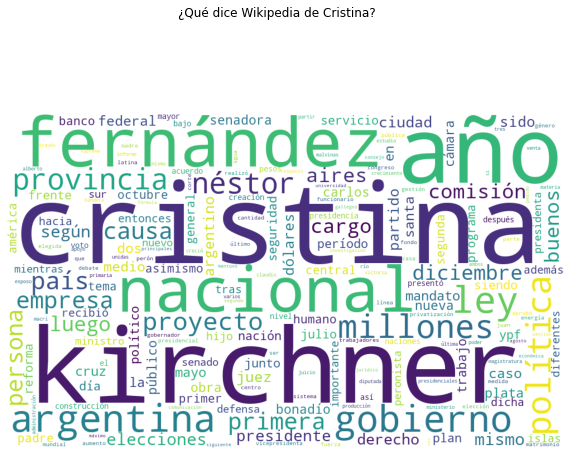

In [20]:
stopwords_spanish = nltk.corpus.stopwords.words('spanish') # Levanto una lista de palabras frecuentes del español
parrafos = [palabra for palabra in parrafos if palabra not in stopwords_spanish]
wc = wordcloud.WordCloud(width = 1000,
                         height = 600,
                         background_color = 'white',
                         collocations = False,
                         ).generate_from_text(' '.join(parrafos))
fig, ax = plt.subplots(figsize = (10,8))
fig.suptitle('¿Qué dice Wikipedia de Cristina?')
ax.imshow(wc)
ax.axis('off')

plt.show()

## ¿Esto es todo?


Parece que no, existen varios paquetes de python que implementan las herramientas que brinda la api para facilitar cierto tipo de búsquedas